# Random Forest Model for Income Classification

**Objective:** This project aimed to build and fine-tune a Random Forest model for income classification based on census data from the 1994 Census database. The primary goal was to predict whether an individual earns more than $50,000 annually using this dataset.

Data source: [UCI Machine Learning Repository - Census Income](https://archive.ics.uci.edu/dataset/20/census+income)

**Project Highlights:**

1. **Exploratory Data Analysis (EDA):** The project began with data exploration to understand the income distribution. It was found that about 77% of the sample had incomes less than $50,000, while 24% had incomes greater than $50,000.

2. **Feature Selection:** Key features were selected for building the Random Forest model, including 'age,' 'capital-gain,' 'capital-loss,' 'hours-per-week,' 'sex,' and 'race.' Categorical variables were converted into binary features using one-hot encoding.

3. **Baseline Model:** A baseline Random Forest model was created with default parameters, resulting in an initial accuracy score on the test set. The accuracy score for the default model was approximately 85.196%.

4. **Hyperparameter Tuning:** The Random Forest model was fine-tuned by testing its performance over a range of `max_depth` values from 1 to 25. The accuracy scores for both the training and test sets were recorded for each `max_depth` value.

5. **Optimal Max_Depth Selection:** The `max_depth` value that yielded the highest accuracy on the test set was identified as the optimal value. In this case, the highest test accuracy was achieved when `max_depth` was set to 12, resulting in an accuracy score of approximately 86.276% on the test set.

6. **Feature Importance Analysis:** The importance of each feature in predicting income status was analyzed using the Random Forest model. The top five features by importance were identified as 'capital-gain,' 'age,' 'hours-per-week,' 'capital-loss,' and 'sex_Male.'

7. **Additional Feature Engineering:** The 'education' feature was further analyzed, and new features, 'education_bin,' were created by binning education levels into three groups: 'HS or less,' 'College to Bachelors,' and 'Masters or more.' The model was then re-tuned with these additional features.

8. **Re-Tuning and Model Improvement:** The Random Forest model was re-tuned with the new features and tested with different `max_depth` values from 1 to 9. The optimal `max_depth` was identified as 9, resulting in an improved test accuracy of approximately 86.446%.

9. **Final Model and Feature Importance:** The final Random Forest model with the optimal `max_depth` of 9 was saved. Feature importances were analyzed again, revealing that having a 'Masters degree or more' was among the top predictors for income classification.

**Conclusion:** This project demonstrated the process of building and optimizing a Random Forest model for income classification. It showcased the importance of hyperparameter tuning and feature engineering in improving model accuracy. Ultimately, the model successfully identified key features that influence income classification, providing valuable insights for future income prediction tasks.

-----

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Read Data

In [21]:
# Define the column names for the dataset
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
             'marital-status', 'occupation', 'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read the CSV dataset into a pandas DataFrame with specified column names
df = pd.read_csv('dataset/adult.data', header=None, names=col_names)

# Clean columns by stripping extra whitespace for columns of type "object"; “ United-States” to “United-States”
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Inspection

In [5]:
# Distribution of income
print(df.income.value_counts(normalize=True))

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


**Summary:** <br>
About 77% of the sample have incomes less than 50k and only 24% have an income greater than 50k.

In [8]:
# Select features and output variable
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']

# Create feature dataframe X with feature columns and dummy variables for categorical features
X = pd.get_dummies(df[feature_cols], drop_first=True)

# Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k
y = np.where(df.income=='<=50K', 0, 1)

# Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

## Build and Tune Random Forest Classifiers by Depth

### Baseline Model

In [10]:
# Instantiate random forest classifier, fit and score with default parameters
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)
print(f'Accuracy score for default random forest: {round(rf.score(x_test, y_test)*100,3)}%')

Accuracy score for default random forest: 82.005%


### Hyperparameter Tuning

In the following I will explore tuning the random forest classifier model by testing the performance over a range of max_depth values. To do so fit a random forest classifier for max_depth values from 1-25 and save the accuracy score for the train and test sets in the lists accuracy_train, accuracy_test.

In [26]:
# Set a random seed for reproducibility
np.random.seed(0)

# Initialize empty lists to store accuracy scores for the train and test sets
accuracy_train = []
accuracy_test = []

# Define a range of max_depth values from 1 to 25
depths = range(1, 26)

# Iterate over each max_depth value and train a RandomForestClassifier
for i in depths:
    # Create a RandomForestClassifier with the current max_depth value
    rf = RandomForestClassifier(max_depth=i)
    
    # Train the classifier on the training data
    rf.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = rf.predict(x_test)
    
    # Calculate and store the accuracy score for the test set
    accuracy_test.append(accuracy_score(y_test, y_pred))
    
    # Calculate and store the accuracy score for the train set
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))

# Find the best accuracy and the corresponding max_depth value
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]

# Print the results
print(f'The highest accuracy on the test set is achieved when max_depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc * 100, 3)}%')

The highest accuracy on the test set is achieved when max_depth: 12
The highest accuracy on the test set is: 84.984%


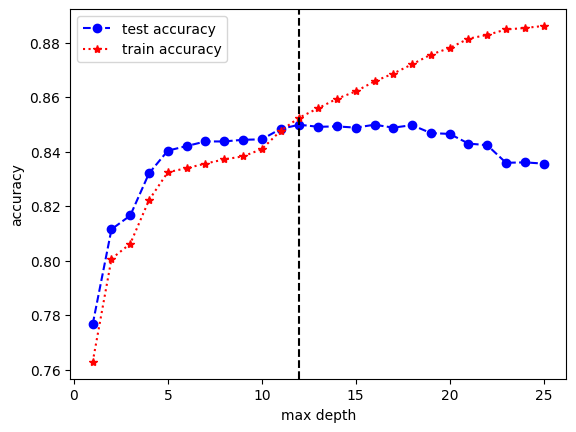

In [27]:
# Plot the accuracy scores for the test and train sets
plt.plot(depths, accuracy_test, 'bo--', depths, accuracy_train, 'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')

# Add a vertical line at max_depth = best_depth
plt.axvline(x=best_depth, color='k', linestyle='--', label='max_depth = 12')

# Show the plot
plt.show()

**Summary:** <br>
While an increasing max_depth increases the accuracy of our model on the train dataset, the accuracy of our model on the test dataset starts to decrease at max_depth = 12.

### Refit Random Forest Model Using Optiaml Max_Depth

In [14]:
# Create the best Random Forest model using the optimal max_depth
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)

# Create a DataFrame to store feature importances
feature_imp_df = pd.DataFrame({'feature': x_train.columns, 'importance': best_rf.feature_importances_})

# Print the top 5 random forest features by importance
print('Top 5 random forest features:')
print(feature_imp_df.sort_values(by='importance', ascending=False).head(5))

Top 5 random forest features:
          feature  importance
1    capital-gain    0.370119
0             age    0.248969
3  hours-per-week    0.140480
2    capital-loss    0.140439
4        sex_Male    0.078258


**Summary:**
The output suggests that the Random Forest model, trained with the best `max_depth` parameter, identifies the following top 5 most important features for predicting income status:

1. `capital-gain`
2. `age`
3. `hours-per-week`
4. `capital-loss`
5. `sex_Male`

These features are considered the most influential in determining whether an individual's income is above or below the 50k threshold.

### Create Additional Features and Re-Tune

Looking at the education feature, there are 16 unique values – from preschool to professional school. Rather than adding dummy variables for each value, it makes sense to bin some of these values together. While there are many ways to do this, I will take the approach of combining the values into 3 groups: High school and less, College to Bachelors and Masters and more.

In [15]:
# Create two new features, based on education and native country
df['education_bin'] = pd.cut(df['education-num'], [0,9,13,16], labels=['HS or less', 'College to Bachelors', 'Masters or more'])

feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']

# Use these two new additional features and recreate X and test/train split
X = pd.get_dummies(df[feature_cols], drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

In [29]:
# Set a random seed for reproducibility
np.random.seed(0)

# Initialize empty lists to store accuracy scores for the train and test sets
accuracy_train = []
accuracy_test = []

# Define a range of max_depth values from 1 to 9
depths = range(1, 10)

# Iterate over each max_depth value and train a RandomForestClassifier
for i in depths:
    # Create a RandomForestClassifier with the current max_depth value
    rf = RandomForestClassifier(max_depth=i)
    
    # Train the classifier on the training data
    rf.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = rf.predict(x_test)
    
    # Calculate and store the accuracy score for the test set
    accuracy_test.append(accuracy_score(y_test, y_pred))
    
    # Calculate and store the accuracy score for the train set
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))

# Find the best accuracy and the corresponding max_depth value
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]

# Print the results
print(f'The highest accuracy on the test set is achieved with max_depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc * 100, 3)}%')

The highest accuracy on the test set is achieved with max_depth: 9
The highest accuracy on the test set is: 84.431%


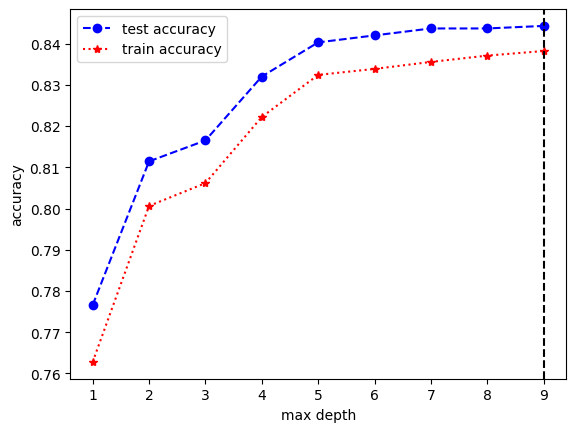

In [30]:
# Plot the accuracy scores for the test and train sets
plt.figure(2)
plt.plot(depths, accuracy_test, 'bo--', depths, accuracy_train, 'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')

# Add a vertical line at max_depth = 9
plt.axvline(x=best_depth, color='k', linestyle='--', label='max_depth = 12')

# Show the plot
plt.show()

**Summary:** <br>
Unlike to the previous figure, we see that an increase in max_depth continues to increases the accuracy of our model on both the train and test dataset. However, the higher the max_depth the less the accuracy increases,ultimately leading the model's performance to plateau at max-depth.

In [32]:
# Create the best Random Forest model using the optimal max_depth
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)

# Create a DataFrame to store feature importances
feature_imp_df = pd.DataFrame({'feature': x_train.columns, 'importance': best_rf.feature_importances_})

# Print the top 5 random forest features by importance
print('Top 5 random forest features:')
print(feature_imp_df.sort_values(by='importance', ascending=False).head(5))

Top 5 random forest features:
                          feature  importance
1                    capital-gain    0.326836
0                             age    0.201973
10  education_bin_Masters or more    0.130849
3                  hours-per-week    0.102162
2                    capital-loss    0.095188


**Summary:**
Interestingly, after binning the education variable, the output of the Random Forest model, trained with the best `max_depth` parameter, identifies having a Masters degree or more among the top five predictors for  determining whether an individual's income is above or below the 50k threshold.